The following code illustrates the methodology adopted in this study to evaluate the performance of Large Language Models (LLMs). We used a comprehensive set of metrics to analyze the effectiveness and consistency of the GPT-4 and Gemini models in solving complex questions from the 2024 admission exam of the Technological Institute of Aeronautics (ITA). The metrics include Accuracy, Precision, Response Consistency, Consistent Errors, and the integrated MAILLM metric.

In [11]:
!apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 ghostscript libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0
  libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x libavalon-framework-

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
data = {
    'Question': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Correct Answer': ['B', 'E', 'A', 'B', 'D', 'C', 'E', 'D', 'C', 'D', 'A', 'C'],
    'GPT-4_turbo_Test_1': ['B', 'C', 'A', 'B', 'B', 'C', 'E', 'D', 'A', 'B', 'A', 'E'],
    'GPT-4_turbo_Test_2': ['B', 'C', 'C', 'B', 'C', 'C', 'B', 'D', 'D', 'A', 'C', 'E'],
    'GPT-4_turbo_Test_3': ['B', 'D', 'A', 'A', 'B', 'C', 'E', 'D', 'B', 'A', 'C', 'D'],
    'Gemini_Advanced_Test_1': ['D', 'C', 'A', 'A', 'D', 'C', 'E', 'A', 'nan', 'D', 'A', 'A'],
    'Gemini_Advanced_Test_2': ['B', 'C', 'A', 'B', 'nan', 'C', 'nan', 'A', 'nan', 'D', 'C', 'A'],
    'Gemini_Advanced_Test_3': ['B', 'C', 'A', 'B', 'C', 'C', 'B', 'B', 'nan', 'E', 'A', 'E']
}

# Create a DataFrame
df = pd.DataFrame(data)

In [2]:
df

,Question,Correct Answer,GPT-4_turbo_Test_1,GPT-4_turbo_Test_2,GPT-4_turbo_Test_3,Gemini_Advanced_Test_1,Gemini_Advanced_Test_2,Gemini_Advanced_Test_3
0,1,B,B,B,B,D,B,B
1,2,E,C,C,D,C,C,C
2,3,A,A,C,A,A,A,A
3,4,B,B,B,A,A,B,B
4,5,D,B,C,B,D,nan,C
5,6,C,C,C,C,C,C,C
6,7,E,E,B,E,E,nan,B
7,8,D,D,D,D,A,A,B
8,9,C,A,D,B,nan,nan,nan
9,10,D,B,A,A,D,D,E


<ipython-input-13-2cdd0e1d970f>:29: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.bar(r1, proportions[0], color='green', width=barWidth, edgecolor='grey', label='Correct')


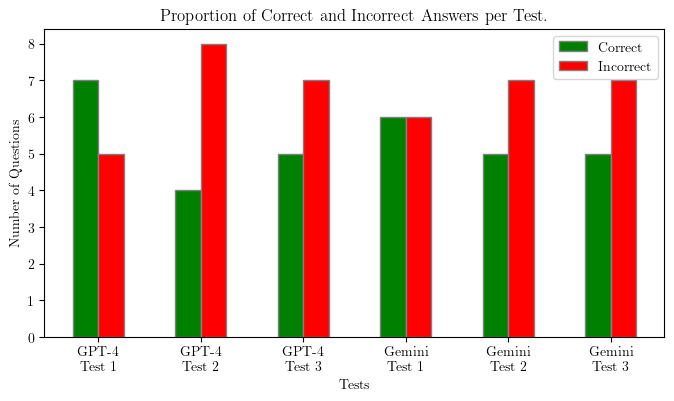

In [13]:
# Use Computer Modern font
plt.rc('font', family='serif', serif='cmr10')
#plt.rc('text', usetex=True)

# Function to calculate proportion of correct and incorrect answers
def calculate_proportions(df, correct_col, test_cols):
    proportions = []
    for col in test_cols:
        correct = (df[correct_col] == df[col]).sum()
        incorrect = len(df) - correct  # Treating NaNs as incorrect
        proportions.append([correct, incorrect])
    return np.array(proportions).T

# Test columns
test_cols = ['GPT-4_turbo_Test_1', 'GPT-4_turbo_Test_2', 'GPT-4_turbo_Test_3',
             'Gemini_Advanced_Test_1', 'Gemini_Advanced_Test_2', 'Gemini_Advanced_Test_3']

# Calculate proportions
proportions = calculate_proportions(df, 'Correct Answer', test_cols)

# Plotting
barWidth = 0.25
r1 = np.arange(len(proportions[0]))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(8, 4))

# Create bars for correct answers
plt.bar(r1, proportions[0], color='green', width=barWidth, edgecolor='grey', label='Correct')
# Create bars for incorrect answers
plt.bar(r2, proportions[1], color='red', width=barWidth, edgecolor='grey', label='Incorrect')

# Add xticks on the middle of the group bars
plt.xlabel('Tests', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(proportions[0]))],
           ['GPT-4\nTest 1', 'GPT-4\nTest 2', 'GPT-4\nTest 3', 'Gemini\nTest 1', 'Gemini\nTest 2', 'Gemini\nTest 3'])

plt.ylabel('Number of Questions')
plt.title('Proportion of Correct and Incorrect Answers per Test.')
plt.legend()
plt.show()

In [15]:
!pip install ace-tools


ERROR: Could not find a version that satisfies the requirement ace-tools (from versions: none)
ERROR: No matching distribution found for ace-tools


In [16]:
# Functions to calculate metrics
def accuracy(correct, test):
    return (correct == test).mean()

def precision(correct, test):
    true_positive = (correct == test).sum()
    false_positive = (correct != test).sum() - test.isna().sum()
    return true_positive / (true_positive + false_positive)

def response_consistency(test1, test2):
    return (test1 == test2).mean()

def consistent_errors(test1, test2):
    errors1 = test1 != df['Correct Answer']
    errors2 = test2 != df['Correct Answer']
    return (errors1 & errors2).mean()

# Initialize results dictionary
results = {
    'Model': [],
    'Metric': [],
    'Test_1': [],
    'Test_2': [],
    'Test_3': [],
    'Mean±SD': []
}

# Models and their tests
models = {
    'GPT-4': ['GPT-4_turbo_Test_1', 'GPT-4_turbo_Test_2', 'GPT-4_turbo_Test_3'],
    'Gemini': ['Gemini_Advanced_Test_1', 'Gemini_Advanced_Test_2', 'Gemini_Advanced_Test_3']
}

# Calculate metrics
for model, tests in models.items():
    acc = [accuracy(df['Correct Answer'], df[test]) for test in tests]
    prec = [precision(df['Correct Answer'], df[test]) for test in tests]
    rc = [response_consistency(df[tests[i]], df[tests[j]]) for i in range(len(tests)) for j in range(i+1, len(tests))]
    ce = [consistent_errors(df[tests[i]], df[tests[j]]) for i in range(len(tests)) for j in range(i+1, len(tests))]

    metrics = [acc, prec, rc, ce]
    metric_names = ['Accuracy', 'Precision', 'Response Consistency', 'Consistent Errors']

    for metric, name in zip(metrics, metric_names):
        results['Model'].append(model)
        results['Metric'].append(name)
        results['Test_1'].append(f"{metric[0]:.2f}")
        results['Test_2'].append(f"{metric[1]:.2f}")
        results['Test_3'].append(f"{metric[2]:.2f}")

        mean_metric = np.mean(metric)
        std_metric = np.std(metric)
        results['Mean±SD'].append(f"{mean_metric:.2f}±{std_metric:.2f}")

# Create results DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
results_df



,Model,Metric,Test_1,Test_2,Test_3,Mean±SD
0,GPT-4,Accuracy,0.58,0.33,0.42,0.44±0.10
1,GPT-4,Precision,0.58,0.33,0.42,0.44±0.10
2,GPT-4,Response Consistency,0.50,0.50,0.42,0.47±0.04
3,GPT-4,Consistent Errors,0.42,0.42,0.50,0.44±0.04
4,Gemini,Accuracy,0.50,0.42,0.42,0.44±0.04
5,Gemini,Precision,0.55,0.56,0.45,0.52±0.05
6,Gemini,Response Consistency,0.50,0.33,0.42,0.42±0.07
7,Gemini,Consistent Errors,0.33,0.33,0.50,0.39±0.08


Integrando a nova métrica de avaliação

In [21]:
# Functions to calculate metrics
def accuracy(correct, test):
    return (correct == test).mean()

def precision(correct, test):
    true_positive = (correct == test).sum()
    false_positive = (correct != test).sum() - test.isna().sum()
    return true_positive / (true_positive + false_positive)

def response_consistency(test1, test2):
    return (test1 == test2).mean()

def consistent_errors(test1, test2):
    errors1 = test1 != df['Correct Answer']
    errors2 = test2 != df['Correct Answer']
    return (errors1 & errors2).mean()

# Initialize results dictionary
results = {
    'Model': [],
    'Metric': [],
    'Test_1': [],
    'Test_2': [],
    'Test_3': [],
    'Mean±SD': []
}

# Models and their tests
models = {
    'GPT-4': ['GPT-4_turbo_Test_1', 'GPT-4_turbo_Test_2', 'GPT-4_turbo_Test_3'],
    'Gemini': ['Gemini_Advanced_Test_1', 'Gemini_Advanced_Test_2', 'Gemini_Advanced_Test_3']
}

# Weights for MAILLM
alpha = 0.4
beta = 0.3
gamma = 0.2
delta = 0.1

# Calculate metrics
for model, tests in models.items():
    acc = [accuracy(df['Correct Answer'], df[test]) for test in tests]
    prec = [precision(df['Correct Answer'], df[test]) for test in tests]
    rc = [response_consistency(df[tests[i]], df[tests[j]]) for i in range(len(tests)) for j in range(i+1, len(tests))]
    ce = [consistent_errors(df[tests[i]], df[tests[j]]) for i in range(len(tests)) for j in range(i+1, len(tests))]

    metrics = [acc, prec, rc, ce]
    metric_names = ['Accuracy', 'Precision', 'Response Consistency', 'Consistent Errors']

    # Calculate MAILLM for each test
    maillm = [alpha * a + beta * p + gamma * r - delta * c for a, p, r, c in zip(acc, prec, rc[:3], ce[:3])]

    for metric, name in zip(metrics, metric_names):
        results['Model'].append(model)
        results['Metric'].append(name)
        results['Test_1'].append(f"{metric[0]:.2f}")
        results['Test_2'].append(f"{metric[1]:.2f}")
        results['Test_3'].append(f"{metric[2]:.2f}")

        mean_metric = np.mean(metric)
        std_metric = np.std(metric)
        results['Mean±SD'].append(f"{mean_metric:.2f}±{std_metric:.2f}")

    # Add MAILLM to the results
    results['Model'].append(model)
    results['Metric'].append('MAILLM')
    results['Test_1'].append(f"{maillm[0]:.2f}")
    results['Test_2'].append(f"{maillm[1]:.2f}")
    results['Test_3'].append(f"{maillm[2]:.2f}")

    mean_maillm = np.mean(maillm)
    std_maillm = np.std(maillm)
    results['Mean±SD'].append(f"{mean_maillm:.2f}±{std_maillm:.2f}")

# Create results DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
results_df


,Model,Metric,Test_1,Test_2,Test_3,Mean±SD
0,GPT-4,Accuracy,0.58,0.33,0.42,0.44±0.10
1,GPT-4,Precision,0.58,0.33,0.42,0.44±0.10
2,GPT-4,Response Consistency,0.50,0.50,0.42,0.47±0.04
3,GPT-4,Consistent Errors,0.42,0.42,0.50,0.44±0.04
4,GPT-4,MAILLM,0.47,0.29,0.33,0.36±0.08
5,Gemini,Accuracy,0.50,0.42,0.42,0.44±0.04
6,Gemini,Precision,0.55,0.56,0.45,0.52±0.05
7,Gemini,Response Consistency,0.50,0.33,0.42,0.42±0.07
8,Gemini,Consistent Errors,0.33,0.33,0.50,0.39±0.08
9,Gemini,MAILLM,0.43,0.37,0.34,0.38±0.04


Plotando em gráficos

<ipython-input-35-5a387baf0ad1>:11: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.boxplot(data, labels=['Test_1', 'Test_2', 'Test_3'])


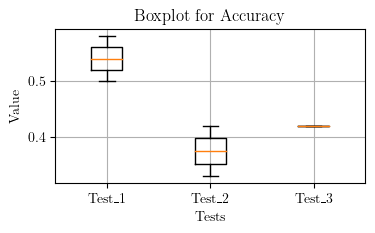

<ipython-input-35-5a387baf0ad1>:11: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.boxplot(data, labels=['Test_1', 'Test_2', 'Test_3'])


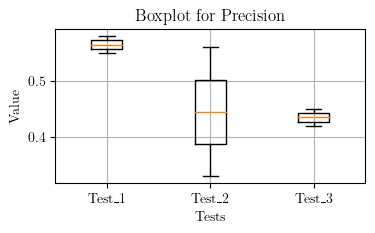

<ipython-input-35-5a387baf0ad1>:11: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.boxplot(data, labels=['Test_1', 'Test_2', 'Test_3'])


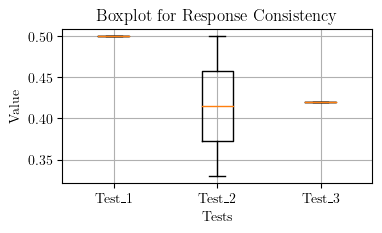

<ipython-input-35-5a387baf0ad1>:11: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.boxplot(data, labels=['Test_1', 'Test_2', 'Test_3'])


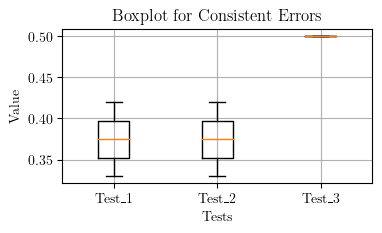

<ipython-input-35-5a387baf0ad1>:11: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.boxplot(data, labels=['Test_1', 'Test_2', 'Test_3'])


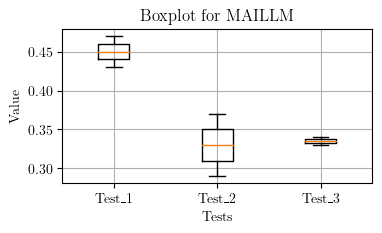

In [35]:
# Function to create boxplots for each metric
def create_boxplot(df, metric):
    # Filter data for the given metric
    metric_data = df[df['Metric'] == metric]
    data = [metric_data['Test_1'].astype(float), metric_data['Test_2'].astype(float), metric_data['Test_3'].astype(float)]

    # Create boxplot
    plt.figure(figsize=(4, 2))
    plt.boxplot(data, labels=['Test_1', 'Test_2', 'Test_3'])
    plt.title(f'Boxplot for {metric}')
    plt.ylabel('Value')
    plt.xlabel('Tests')
    plt.grid(True)
    plt.show()

# List of metrics
metrics = ['Accuracy', 'Precision', 'Response Consistency', 'Consistent Errors', 'MAILLM']

# Create boxplots for each metric
for metric in metrics:
    create_boxplot(results_df, metric)




<ipython-input-41-3166e41e424d>:21: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.boxplot(data, labels=['GPT-4', 'Gemini'])


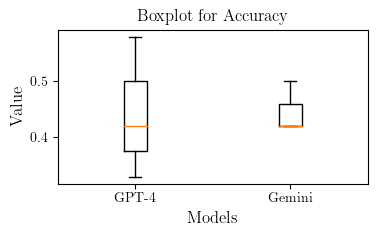

<ipython-input-41-3166e41e424d>:21: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.boxplot(data, labels=['GPT-4', 'Gemini'])


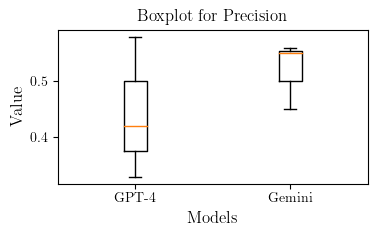

<ipython-input-41-3166e41e424d>:21: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.boxplot(data, labels=['GPT-4', 'Gemini'])


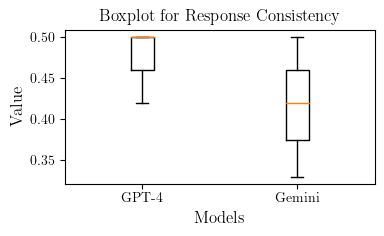

<ipython-input-41-3166e41e424d>:21: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.boxplot(data, labels=['GPT-4', 'Gemini'])


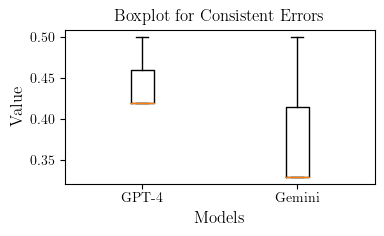

<ipython-input-41-3166e41e424d>:21: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.boxplot(data, labels=['GPT-4', 'Gemini'])


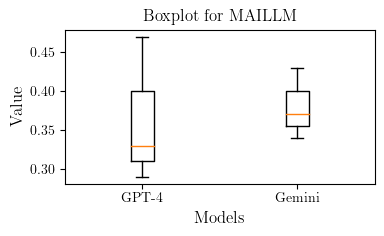

In [41]:
df = results_df
# Function to create boxplots for each metric with both models in a single plot
def create_combined_boxplot(df, metric):
    # Filter data for the given metric and models
    metric_data_gpt4 = df[(df['Metric'] == metric) & (df['Model'] == 'GPT-4')]
    metric_data_gemini = df[(df['Metric'] == metric) & (df['Model'] == 'Gemini')]

    # Prepare data for boxplot
    data = [
        metric_data_gpt4['Test_1'].astype(float).values.tolist() +
        metric_data_gpt4['Test_2'].astype(float).values.tolist() +
        metric_data_gpt4['Test_3'].astype(float).values.tolist(),

        metric_data_gemini['Test_1'].astype(float).values.tolist() +
        metric_data_gemini['Test_2'].astype(float).values.tolist() +
        metric_data_gemini['Test_3'].astype(float).values.tolist()
    ]

    # Create boxplot
    plt.figure(figsize=(4, 2))
    plt.boxplot(data, labels=['GPT-4', 'Gemini'])
    plt.title(f'Boxplot for {metric}', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.xlabel('Models', fontsize=12)
    plt.grid(False)
    plt.show()

# List of metrics
metrics = ['Accuracy', 'Precision', 'Response Consistency', 'Consistent Errors', 'MAILLM']

# Create combined boxplots for each metric
for metric in metrics:
    create_combined_boxplot(results_df, metric)
